In [1]:
# standard python imports
import numpy as np
import matplotlib.pylab as plt

# tidy3D import
import tidy3d as td
from tidy3d.constants import C_0
from tidy3d.plugins.mode import ModeSolver

import custom.spatial_medium as sm

import xarray as xr
td.config.logging_level = "ERROR"

# size of simulation domain
Lx, Ly, Lz = 2, 2, 2
dl = 0.06667

# waveguide information
wg_width = 0.7
wg_permittivity = 3.47**2
plane_size = (4, 0, 3.5)

# central frequency
wvl_um = 1.55
freq0 = C_0 / wvl_um
fwidth = freq0 / 3

# run_time in ps
run_time = 1e-12

# automatic grid specification
# grid_spec = td.GridSpec.auto(min_steps_per_wvl=20, wavelength=wvl_um)
grid_spec = td.GridSpec.uniform(dl=dl)

plane = td.Box(center=(0, 0, 0), size=plane_size)
mode_spec = td.ModeSpec(
    num_modes=3,
)
freqs = [freq0]

def solve_one_width(wg_width, use_subpixel=False):
    mesh = td.TriangleMesh.from_stl("./wg.stl", scale=(wg_width / 0.5, 1, 1))

    print("solve with: ", mesh.bounding_box)

    waveguide = td.Structure(
        geometry=mesh,
        medium=td.Medium(permittivity=wg_permittivity),
    )

    if use_subpixel:
        sim = td.Simulation(
        size=(Lx, Ly, Lz),
        grid_spec=grid_spec,
        structures=[waveguide],
        run_time=run_time,
        boundary_spec=td.BoundarySpec.all_sides(boundary=td.Periodic()),
        medium=td.Medium(permittivity=1.444**2),
        )

        creator = sm.SpatialMediumCreator3(sim)
        medium, _ = creator.create()

        waveguide = td.Structure(
            geometry=mesh,
            medium = medium,
        )

    sim = td.Simulation(
        size=(Lx, Ly, Lz),
        grid_spec=grid_spec,
        structures=[waveguide],
        run_time=run_time,
        boundary_spec=td.BoundarySpec.all_sides(boundary=td.Periodic()),
        medium=td.Medium(permittivity=1.444**2),
    )

    mode_solver = ModeSolver(
        simulation=sim,
        plane=plane,
        mode_spec=mode_spec,
        freqs=freqs,
    )
    mode_data = mode_solver.solve()
    return mode_data

solve by width

In [28]:
nums_width = 10
width = 0.3
widths = np.linspace(wg_width - width, wg_width + width, nums_width)
neffs = []
for w in widths:
    mode_data = solve_one_width(w)
    neffs.append(mode_data.n_eff.values[0])
da = xr.DataArray(neffs, coords={'width': widths, 'mode0': np.arange(3)})



solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.39999995231679997, 0.40000000596, 0.22000046074399998)
solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.46666661103626667, 0.40000000596, 0.22000046074399998)
solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.5333332697557334, 0.40000000596, 0.22000046074399998)
solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.5999999284752, 0.40000000596, 0.22000046074399998)
solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.6666665871946668, 0.40000000596, 0.22000046074399998)
solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.7333332459141334, 0.40000000596, 0.22000046074399998)
solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.7999999046336, 0.40000000596, 0.22000046074399998)
solve with:  attrs={} type='Box' cente

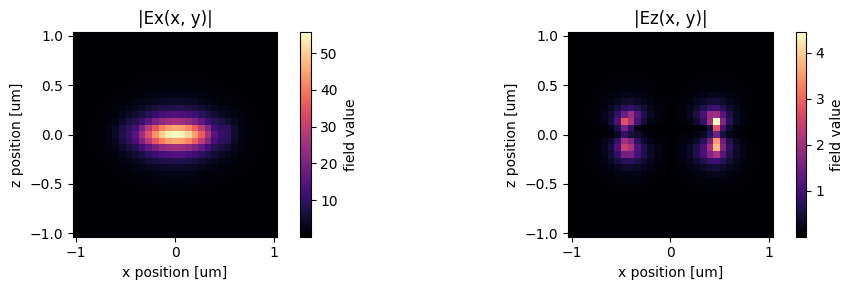

In [9]:
f0_ind = 0
f, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(10, 3))
abs(mode_data.Ex.isel(mode_index=0, f=f0_ind)).plot(x="x", y="z", ax=ax1, cmap="magma")
abs(mode_data.Ez.isel(mode_index=0, f=f0_ind)).plot(x="x", y="z", ax=ax2, cmap="magma")

ax1.set_title("|Ex(x, y)|")
ax1.set_aspect("equal")
ax2.set_title("|Ez(x, y)|")
ax2.set_aspect("equal")
plt.show()

In [6]:
neffs = []
for w in widths:
    mode_data = solve_one_width(w, True)
    neffs.append(mode_data.n_eff.values[0])

da2 = xr.DataArray(neffs, coords={'width': widths, 'mode': np.arange(3)})

solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.39999995231679997, 0.40000000596, 0.22000046074399998)
process total cells: 27000 on 20 cores
Calc Time elapsed: 53.3465817
Average Time elapsed: 6.724389300000013
solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.46666661103626667, 0.40000000596, 0.22000046074399998)
process total cells: 27000 on 20 cores
Calc Time elapsed: 60.944693899999976
Average Time elapsed: 7.246104900000034
solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.5333332697557334, 0.40000000596, 0.22000046074399998)
process total cells: 27000 on 20 cores
Calc Time elapsed: 74.17767660000004
Average Time elapsed: 7.5713537000000315
solve with:  attrs={} type='Box' center=(0.0, 0.0, -1.4901199999611814e-07) size=(0.5999999284752, 0.40000000596, 0.22000046074399998)
process total cells: 27000 on 20 cores
Calc Time elapsed: 77.67928230000001
Average Time elapsed: 7.607042

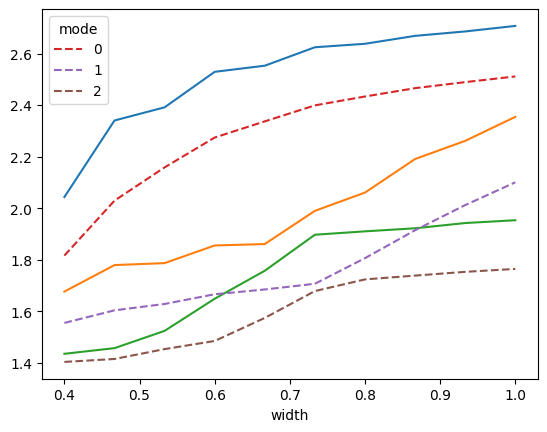

In [34]:
fig, ax = plt.subplots()
da.plot.line(x='width', ax=ax, add_legend=True)
l2 = da2.plot.line(x='width', ax=ax, linestyle='--', add_legend=True)
# legend = ax.legend(handles=l2, loc='upper right')
# ax.add_artist(legend)

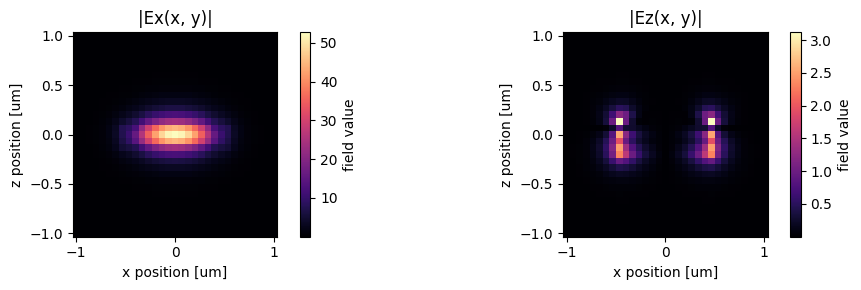

In [11]:
f0_ind = 0
f, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(10, 3))
abs(mode_data.Ex.isel(mode_index=0, f=f0_ind)).plot(x="x", y="z", ax=ax1, cmap="magma")
abs(mode_data.Ez.isel(mode_index=0, f=f0_ind)).plot(x="x", y="z", ax=ax2, cmap="magma")

ax1.set_title("|Ex(x, y)|")
ax1.set_aspect("equal")
ax2.set_title("|Ez(x, y)|")
ax2.set_aspect("equal")
plt.show()

In [28]:
print(neffs)

[array([1.8158449, 1.5544627, 1.4030159], dtype=float32), array([2.0690615, 1.6102618, 1.4251825], dtype=float32), array([2.2392535, 1.648066 , 1.4697703], dtype=float32), array([2.3306646, 1.6818525, 1.5669365], dtype=float32), array([2.4028714, 1.7169149, 1.6879097], dtype=float32), array([2.4475224, 1.8513532, 1.7309321], dtype=float32), array([2.484973 , 1.995956 , 1.7502825], dtype=float32), array([2.5111957, 2.1002479, 1.7640806], dtype=float32)]
